# Redes Neurais
# Exercício 07
Tarefa Final

# 1 - Implementação do algoritmo BackPropagation

In [2]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.special import expit
import random

#Funções de ativação
def tanh(x):
    return (1.0 - np.exp(-2*x))/(1.0 + np.exp(-2*x))
def tanh_derivada(x):
    return (1 + x)*(1 - x)

def sigmoid(x):
    return 1. / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1. - x)

def ReLU(x):
    return x * (x > 0)

def dReLU(x):
    return 1. * (x > 0)

class BackPropagation(BaseEstimator, ClassifierMixin):
  def __init__(self, n_epochs = 500, lr = 0.05, n_nos = 5):
    if n_epochs is None:
      self.epochs = 500
    else:
      self.epochs = n_epochs
    if lr is None:
      self.learning_rate = 0.05
    else:
      self.learning_rate = lr
    if n_nos is None:
      self.nos = 4
    else:
      self.nos = n_nos
  def fit(self, X, y=None):

    X_b = np.hstack((np.ones((X.shape[0],1)),X))
    self.inputW2= random.sample(range(-15, 15), self.nos+1) #Pesos que multiplicam o nó z3

    self.inputW1 = []
    for j in range(self.nos):
      w = random.sample(range(-20, 20), len(X[0])+1)
      self.inputW1.append(w) #Pesos que multiplicam as entradas

    for i in range(self.epochs):
      for k, ya in zip(X_b, y):        
        z2=[]
        for b in range(self.nos):
          z_hidden = np.sum(np.multiply(k, self.inputW1[b])) #Valor do nó antes função de ativação
          z2.append(z_hidden)

        a2=[]
        for c in z2:
          a_hidden = sigmoid(c)
          a2.append(a_hidden)

        a2 = np.insert(a2, 0, 1) #Inclusão do bias na camada interna
        z3 = np.sum(np.multiply(a2, self.inputW2)) #Valor do nó Z3 antes função de ativação
        a3 = ReLU(z3) #Aplicação da função de ativação

        # Aplicação de um "threshold" para o resultado não ser um float (o que atrapalha a comparação)
        if a3 >= 0.6:
          a3 = 1
        else:
          a3 = 0

        # Fase Backward
        d3 = a3 - ya #Cálculo do erro da última camada
        self.inputW2 = self.inputW2 - (self.learning_rate*d3*a2) #Atualização do peso

        d2=[]
        for d in range(self.nos):
          d_hidden = (self.inputW2[d+1]*d3)*dsigmoid(a2[d+1]) #Cálculo do erro da camada interna
          d2.append(d_hidden)

        for m in range(len(d2)):
          self.inputW1[m] = self.inputW1[m] - (self.learning_rate*d2[m]*k) #Atualização do peso

  def predict(self, X, y=None):
    X_b = np.hstack((np.ones((X.shape[0],1)),X))
    y_pred = []
    for k in X_b:      
      z2=[]
      for b in range(self.nos):
        z_hidden = np.sum(np.multiply(k, self.inputW1[b])) #Valor do nó antes função de ativação
        z2.append(z_hidden)

      a2=[]
      for c in z2:
        a_hidden = sigmoid(c)
        a2.append(a_hidden)

      a2 = np.insert(a2, 0, 1) #Inclusão do bias na camada interna

      z3 = np.sum(np.multiply(a2, self.inputW2)) #Valor do nó Z3 antes função de ativação
      a3 = ReLU(z3) #Aplicação da função de ativação
      
      # Aplicação de um "threshold" para o resultado não ser um float (o que atrapalha a comparação)
      if a3 >= 0.6:
        a3 = 1
      else:
        a3 = 0

      y_pred = np.append(y_pred, a3)

    return y_pred


# 2 - Criação da Base e Plotagem dos Resultados

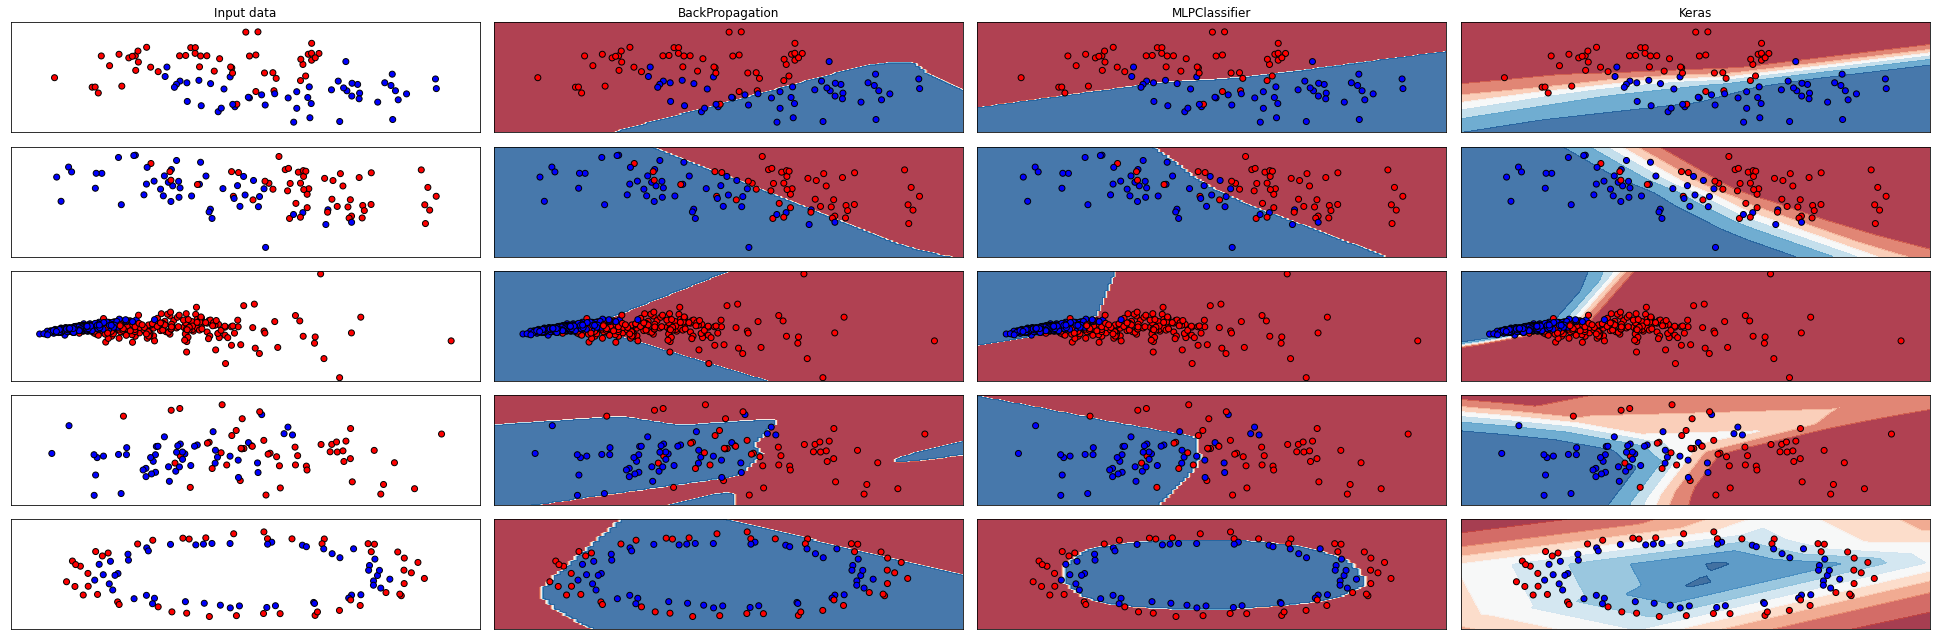

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


import warnings
warnings.filterwarnings("ignore")

h = .05  # step size in the mesh

# Keras Classifier
keras_clf = Sequential()
keras_clf.add(Dense(12, activation='relu'))
keras_clf.add(Dense(1, activation='sigmoid'))
keras_clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], )

names = ["BackPropagation", "MLPClassifier", "Keras"]

classifiers = [
    BackPropagation(), MLPClassifier(), keras_clf]

# Criação das bases

X1, y1 = make_moons(noise=0.3)
base1 = (X1, y1)

X2, y2 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X2 += 2 * rng.uniform(size=X2.shape)
base2 = (X2, y2)

breast = datasets.load_breast_cancer()
X3 = breast.data
y3 = breast.target
base3 = (X3, y3)

X4, y4 = make_classification(n_features=20, n_samples=100, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X4 += 2 * rng.uniform(size=X4.shape)
base4 = (X4, y4)

X5, y5 = make_circles(noise=0.05)
base5 = (X5, y5)

datasets = [base1, base2, base3, base4, base5]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterar as bases
for ds_cnt, ds in enumerate(datasets):
      
    X, y = ds

    # aplica PCA para casos com mais de 2 características
    if X.shape[1] != 2:
      pca = PCA(n_components=2)
      pca.fit(X)
      X = pca.transform(X)

    sts = StandardScaler()
    X = sts.fit_transform(X)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plota a base
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plota os dados
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # itera os classificadores
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        if name == "Keras":
          clf.fit(X, y, epochs=500, verbose=0)
        else:
          clf.fit(X, y)

        # plota os limites de decisão
        if hasattr(clf, "predict"):
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # plota com as cores
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # plota os pontos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
                   edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        i += 1

plt.tight_layout()
plt.show()


# 3 - Códigos do Performance Evaluator e Experimenter
Códigos utilizados na matéria de Reconhecimento de Padrões

In [5]:
from sklearn.model_selection import KFold
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
import numpy as np
import time
import statistics as st
from prettytable import PrettyTable

class PerformanceEvaluator():
  def __init__(self, X, y, f):
    X_sparse = coo_matrix(X)
    self.X, X_sparse, self.y = shuffle(X, X_sparse, y)
    self.kf = f
  def folds(self, clf):
    folds = []
    times = []
    for train_index, test_index in self.kf.split(self.X, self.y):
      t0 = time.time()
      if clf == keras_clf:
        clf.fit(self.X[train_index],self.y[train_index], epochs=100, verbose=0)
      else:
        clf.fit(self.X[train_index],self.y[train_index])
      t1 = time.time()
      if clf == keras_clf:
        _, accuracy = clf.evaluate(self.X[test_index],self.y[test_index], verbose=0)
        folds.append(accuracy)
      else:
        folds.append(clf.score(self.X[test_index],self.y[test_index]))
      times.append(t1-t0)
    return folds, times
  def score(self, clf):
    fd, tt = self.folds(clf)
    return np.mean(fd), np.mean(tt), st.stdev(fd) 

class Experimenter():
  def __init__(self):
    self.datasets = []
    self.predictors = []
  def addDataset(self, dataset):
    self.datasets.append(dataset)
  def addPredictor(self, predictor):
    self.predictors.append(predictor)
  def perform(self,f):
    pt_times = PrettyTable()
    pt_mean = PrettyTable()
    pt_std = PrettyTable()
    preds = ["Dataset"]
    for predname, pred in self.predictors:
      preds.append(predname)
    pt_times.field_names = preds
    pt_mean.field_names = preds
    pt_std.field_names = preds
    for dsn, X, y in self.datasets:
      # aplica PCA para casos com mais de 2 características
      if X.shape[1] != 2:
        pca = PCA(n_components=2)
        pca.fit(X)
        X = pca.transform(X)
      
      pe = PerformanceEvaluator(X,y,f)
      linha_times = [dsn]
      linha_mean = [dsn]
      linha_std = [dsn]
      for predname, pred in self.predictors:
        score, times, std = pe.score(pred)
        linha_times.append(times)
        linha_mean.append(score)
        linha_std.append(std)
      pt_times.add_row(linha_times)
      pt_mean.add_row(linha_mean)
      pt_std.add_row(linha_std)
    print("Tempos Médios")
    print(pt_times)
    print()
    print("Score")
    print(pt_mean)
    print()
    print("Desvio Padrão")
    print(pt_std)
    print()

# 4 - Geração das Tabelas Comparativas

In [6]:
back_clf = BackPropagation()
mlp_clf = MLPClassifier()

exp = Experimenter()
exp.addPredictor(('backpropagation', back_clf))
exp.addPredictor(('mlpclassifier', mlp_clf))
exp.addPredictor(('keras', keras_clf))

exp.addDataset(('base1', base1[0], base1[1]))
exp.addDataset(('base2', base2[0], base2[1]))
exp.addDataset(('base3', base3[0], base3[1]))
exp.addDataset(('base4', base4[0], base4[1]))


kf = KFold(5)
exp.perform(f=kf)

Tempos Médios
+---------+--------------------+---------------------+--------------------+
| Dataset |  backpropagation   |    mlpclassifier    |       keras        |
+---------+--------------------+---------------------+--------------------+
|  base1  | 4.2328911304473875 | 0.11337161064147949 | 0.3211357593536377 |
|  base2  | 4.150028705596924  | 0.11602950096130371 | 0.3265206813812256 |
|  base3  | 24.848380661010744 | 0.14507560729980468 | 1.1662004947662354 |
|  base4  | 4.180991744995117  | 0.11896867752075195 | 0.3231156826019287 |
+---------+--------------------+---------------------+--------------------+

Score
+---------+--------------------+--------------------+--------------------+
| Dataset |  backpropagation   |   mlpclassifier    |       keras        |
+---------+--------------------+--------------------+--------------------+
|  base1  |        0.8         | 0.8400000000000001 | 0.8899999856948853 |
|  base2  |        0.79        |        0.82        | 0.820000004768371

# 5 - Análise dos Resultados

Os resultados indicam que a acurácia dos classificadores são similares para as bases avaliadas. Com relação aos tempos médios, verifica-se que a performance do algoritmo desenvolvido (Backpropagation) é bem inferior aos demais, o que até é previsível, já que a elaboração no caso não buscou aperfeiçoamentos. Já em relação ao desvio padrão, vemos que os valores para cada base é similar entre os algoritmos analisados.